## Comparing Machine Learning and Deep Learning Models for Brain Tumor Detection

**Run the code cell below** to import the required packages.

In [1]:
# import modules
import os
import cv2
import random
import numpy as np
import pandas as pd
import seaborn as sns
from pathlib import Path
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import plot_confusion_matrix, classification_report, confusion_matrix

import warnings
warnings.filterwarnings('ignore')

### 1. Generate the training and testing sets

In [2]:
# declare directories 
directory = "./images"
categories = ["no", "yes"]

In [3]:
# resize data
size = 100

In [4]:
# save data
data = []

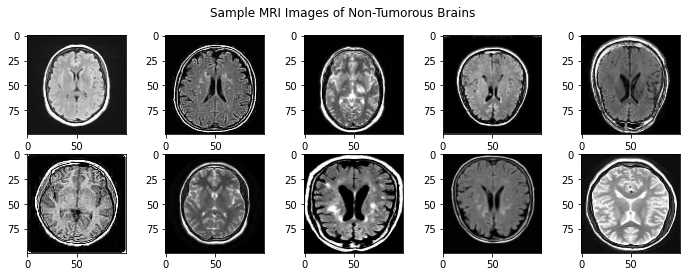

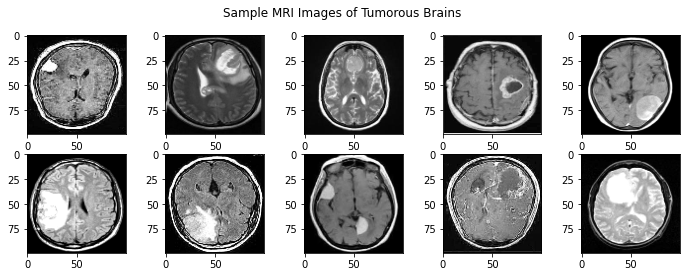

In [5]:
# load data with appropriate class and display sample images
loaded_data = []

def load_data():
    for category in categories:
        path = os.path.join(directory, category)
        class_value = categories.index(category)
        display_images, rows, columns = 1, 2, 5
        fig = plt.figure(figsize=(12,4))
        if class_value == 0:
            fig.suptitle("Sample MRI Images of Non-Tumorous Brains")
        else: 
            fig.suptitle("Sample MRI Images of Tumorous Brains")
        for img in os.listdir(path):
            img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
            img_array_resize = cv2.resize(img_array, (size, size))
            if display_images <= 10:
                fig.add_subplot(rows, columns, display_images)
                plt.imshow(img_array_resize, cmap = "gray")
                display_images = display_images + 1
            img_array_flatten = img_array_resize.flatten()
            img_array_with_class = np.append(img_array_resize, class_value)
            loaded_data.append(img_array_with_class)
load_data()

In [6]:
# convert data from list to dataframe
data = pd.DataFrame(loaded_data)

In [7]:
# shuffle data
data = data.sample(frac = 1, random_state = 42).reset_index(drop = True)

In [8]:
# display sample of shuffled data
data.head()

,0,1,2,3,4,5,6,7,8,9,...,9991,9992,9993,9994,9995,9996,9997,9998,9999,10000
0,20,20,20,15,15,15,14,12,13,14,...,82,82,82,82,82,82,85,84,93,1
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,3,3,3,3,3,1,0,0,0,...,0,0,0,0,0,0,0,0,1,1
3,5,5,5,5,5,5,5,6,7,7,...,1,2,5,3,2,1,0,0,0,0
4,1,1,1,1,1,1,1,1,1,1,...,30,30,30,30,30,30,30,32,30,1


In [9]:
# separate features and labels 
X = data.iloc[:,:-1]
y = data.iloc[:,-1:]

In [10]:
# normalize the features
X = X / 255

In [11]:
# get training and testing datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 21)

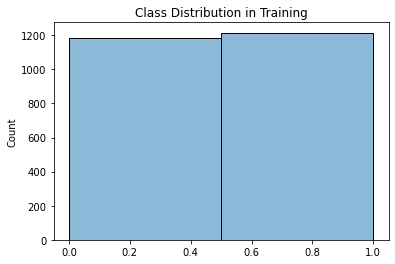

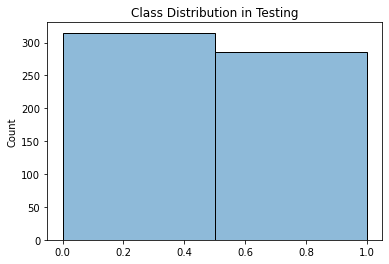

In [12]:
# plot of class distribution
sns.histplot(y_train, bins = 2)
plt.title("Class Distribution in Training")
plt.legend([],[], frameon = False)
plt.show()
sns.histplot(y_test, bins = 2)
plt.title("Class Distribution in Testing")
plt.legend([],[], frameon = False)
plt.show()

### 2. Detect brain tumors using k-means clustering

In [13]:
%%time
# predict the labels using k-means clustering
base_km = KMeans(n_clusters = 2, verbose = 0, random_state = 1)
pred = base_km.fit_predict(X_test)
print(classification_report(y_test, pred))
print(confusion_matrix(y_test, pred))

              precision    recall  f1-score   support

           0       0.37      0.29      0.33       315
           1       0.37      0.46      0.41       285

    accuracy                           0.37       600
   macro avg       0.37      0.37      0.37       600
weighted avg       0.37      0.37      0.37       600

[[ 92 223]
 [155 130]]
CPU times: user 1.6 s, sys: 157 ms, total: 1.75 s
Wall time: 576 ms


In [14]:
%%time
# swap the values of the predicted labels (0 -> 1, 1 -> 0)
pred = 1 - pred
print(classification_report(y_test, pred))
print(confusion_matrix(y_test, pred))

              precision    recall  f1-score   support

           0       0.63      0.71      0.67       315
           1       0.63      0.54      0.58       285

    accuracy                           0.63       600
   macro avg       0.63      0.63      0.63       600
weighted avg       0.63      0.63      0.63       600

[[223  92]
 [130 155]]
CPU times: user 21.1 ms, sys: 4.87 ms, total: 25.9 ms
Wall time: 6.5 ms


### 3. Detect brain tumors using k-nearest neighbor

#### 3.1. K-nearest neighbor with default parameters

              precision    recall  f1-score   support

           0       0.78      0.97      0.86       315
           1       0.95      0.69      0.80       285

    accuracy                           0.84       600
   macro avg       0.86      0.83      0.83       600
weighted avg       0.86      0.84      0.83       600

CPU times: user 2.55 s, sys: 159 ms, total: 2.71 s
Wall time: 688 ms


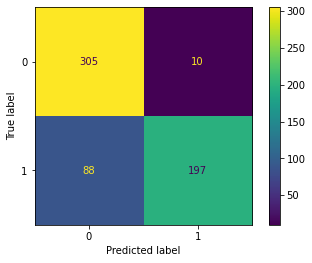

In [15]:
%%time
# predict the labels using the k-nearest neighbor
base_knn = KNeighborsClassifier()
base_knn.fit(X_train, y_train)
pred = base_knn.predict(X_test)
print(classification_report(y_test, pred))
print(plot_confusion_matrix(base_knn, X_test, y_test))

#### 3.2. K-nearest neighbor with optimized parameters

In [24]:
%%time 
# hyperparameter tuning
parameters_grid = {
    "n_neighbors": [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
}
grid_search = GridSearchCV(KNeighborsClassifier(), parameters_grid, cv = 5, scoring = "accuracy", verbose = 1)
grid_search.fit(X_train, y_train)
print("Score: ", grid_search.best_score_)
print("Parameters: ", grid_search.best_params_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Score:  0.9533333333333334
Parameters:  {'n_neighbors': 1}
CPU times: user 55.2 s, sys: 5.7 s, total: 1min
Wall time: 17 s


              precision    recall  f1-score   support

           0       0.94      0.98      0.96       315
           1       0.98      0.93      0.96       285

    accuracy                           0.96       600
   macro avg       0.96      0.96      0.96       600
weighted avg       0.96      0.96      0.96       600

CPU times: user 2.39 s, sys: 102 ms, total: 2.49 s
Wall time: 655 ms


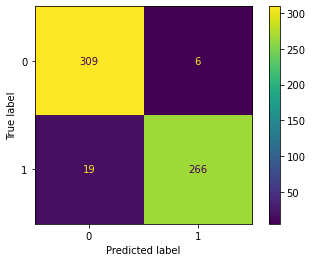

In [17]:
%%time
# predict the labels using the k-nearest neighbor
best_knn = KNeighborsClassifier(n_neighbors = 1)
best_knn.fit(X_train, y_train)
pred = best_knn.predict(X_test)
print(classification_report(y_test, pred))
print(plot_confusion_matrix(best_knn, X_test, y_test))

### 4. Detect brain tumors using a multilayer perceptron

#### 4.1. Multilayer perceptron with default parameters

              precision    recall  f1-score   support

           0       0.96      0.97      0.96       315
           1       0.97      0.95      0.96       285

    accuracy                           0.96       600
   macro avg       0.96      0.96      0.96       600
weighted avg       0.96      0.96      0.96       600

CPU times: user 3min 53s, sys: 27.9 s, total: 4min 21s
Wall time: 1min 6s


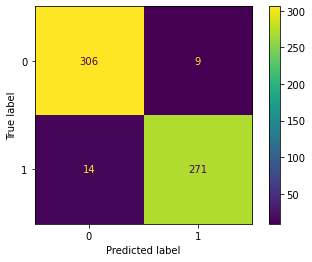

In [18]:
%%time
# predict the labels using a multilayer perceptron
base_mlp = MLPClassifier(random_state = 1)
base_mlp.fit(X_train, y_train)
pred = base_mlp.predict(X_test)
print(classification_report(y_test, pred))
print(plot_confusion_matrix(base_mlp, X_test, y_test))

#### 4.2. Multilayer perceptron with optimized parameters

In [19]:
%%time 
# hyperparameter tuning (part 1)
parameters_grid = {
    "hidden_layer_sizes": [5],
    "activation": ["identity", "logistic", "tanh", "relu"],
    "solver": ["lbfgs", "sgd", "adam"]
}
grid_search = GridSearchCV(MLPClassifier(), parameters_grid, cv = 5, scoring = "accuracy", verbose = 1)
grid_search.fit(X_train, y_train)
print("Score: ", grid_search.best_score_)
print("Parameters: ", grid_search.best_params_)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
Score:  0.9574999999999999
Parameters:  {'activation': 'relu', 'hidden_layer_sizes': 5, 'solver': 'sgd'}
CPU times: user 2h 10min 38s, sys: 13min 48s, total: 2h 24min 26s
Wall time: 36min 39s


In [22]:
%%time 
# hyperparameter tuning (part 2)
parameters_grid = {
    "hidden_layer_sizes": [10, 100, (10,100)],
    "activation": ["relu"],
    "solver": ["sgd"]
}
grid_search = GridSearchCV(MLPClassifier(), parameters_grid, cv = 5, scoring = "accuracy", verbose = 1)
grid_search.fit(X_train, y_train)
print("Score: ", grid_search.best_score_)
print("Parameters: ", grid_search.best_params_)

Fitting 5 folds for each of 3 candidates, totalling 15 fits
Score:  0.9645833333333333
Parameters:  {'activation': 'relu', 'hidden_layer_sizes': 100, 'solver': 'sgd'}
CPU times: user 1h 6min 31s, sys: 7min 39s, total: 1h 14min 11s
Wall time: 19min 12s


              precision    recall  f1-score   support

           0       0.97      0.97      0.97       315
           1       0.97      0.96      0.97       285

    accuracy                           0.97       600
   macro avg       0.97      0.97      0.97       600
weighted avg       0.97      0.97      0.97       600

CPU times: user 5.74 s, sys: 260 ms, total: 6 s
Wall time: 1.51 s


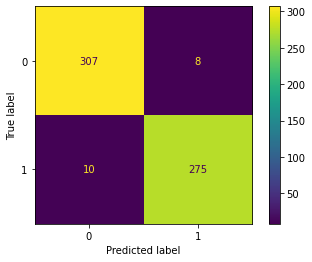

In [23]:
%%time
# predict the labels using a multilayer perceptron
best_mlp = MLPClassifier(hidden_layer_sizes = 10, activation = "identity", solver = "lbfgs", random_state = 1)
best_mlp.fit(X_train, y_train)
pred = best_mlp.predict(X_test)
print(classification_report(y_test, pred))
print(plot_confusion_matrix(best_mlp, X_test, y_test))